## Observations and Insights

Drug Regimens Capomulin and Ramicane were the only two drugs in the given dataset that were able to reduce the volume of the tumor as the timepoint progressed. The rest of all increased the tumor volume as the timepoint progressed.

There is strong correlation between mouse weight and average tumor volume for the mice on Capomulin regimen. This is collaborated by the fact that the person correlation coefficient is greater than 0.7 in this case 0.84 to be exact.

Distribution of female versus male mice was nearly even. There were 125 female mice to the 124 male ones which is a good mix of demographics

## Dependencies and starter code

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mouse_study_results = pd.merge(mouse_metadata, study_results, on='Mouse ID')
mouse_study_results

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mouse_study_results_mean = mouse_study_results.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
mouse_study_results_mean = mouse_study_results_mean.reset_index(name='Mean')

mouse_study_results_median = mouse_study_results.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
mouse_study_results_median = mouse_study_results_median.reset_index(name='Median')

mouse_study_results_variance = mouse_study_results.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
mouse_study_results_variance = mouse_study_results_variance.reset_index(name='Variance')

mouse_study_results_std = mouse_study_results.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
mouse_study_results_std = mouse_study_results_std.reset_index(name='STD')

mouse_study_results_sem = mouse_study_results.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
mouse_study_results_sem = mouse_study_results_sem.reset_index(name='SEM')

mouse_study_summary_df = pd.merge(mouse_study_results_mean, mouse_study_results_median, on = 'Drug Regimen')
mouse_study_summary_df = pd.merge(mouse_study_summary_df, mouse_study_results_variance, on = 'Drug Regimen')
mouse_study_summary_df = pd.merge(mouse_study_summary_df, mouse_study_results_std, on = 'Drug Regimen')
mouse_study_summary_df = pd.merge(mouse_study_summary_df, mouse_study_results_sem, on = 'Drug Regimen')

mouse_study_summary_df

,Drug Regimen,Mean,Median,Variance,STD,SEM
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar plots

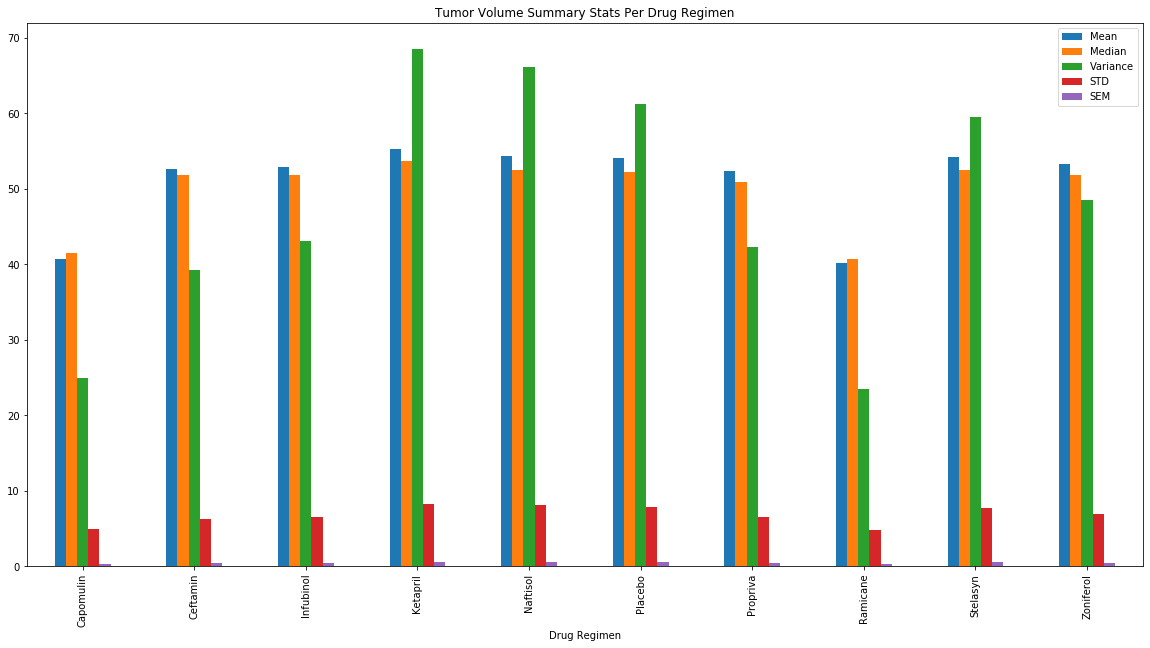

<Figure size 432x288 with 0 Axes>

In [19]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
mouse_study_summary_df.plot(x='Drug Regimen', kind='bar',width=0.5, figsize=(20,10))

# Set a title for the chart
plt.title("Tumor Volume Summary Stats Per Drug Regimen")

plt.show()
plt.tight_layout()

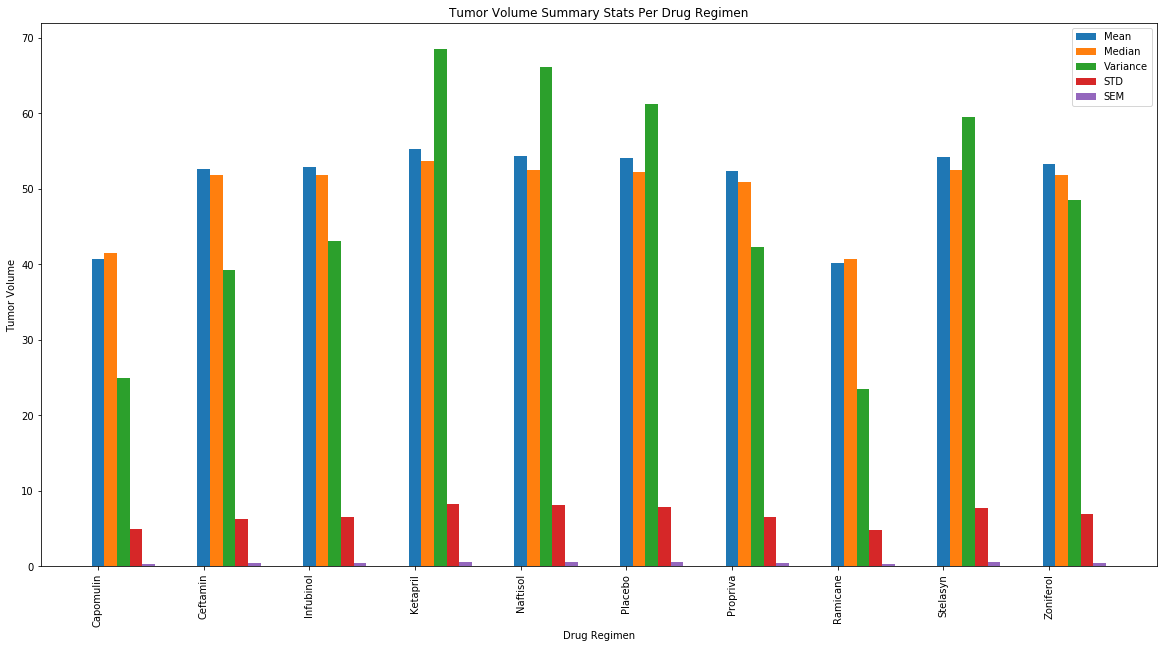

In [21]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
# Set x axis and tick locations

x_axis = np.arange(len(mouse_study_summary_df))
tick_locations = [value for value in x_axis]
width = 0.12

# # Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,10))
plt.bar(x_axis, mouse_study_summary_df["Mean"], width)
plt.bar([p + width for p in x_axis], mouse_study_summary_df["Median"], width)
plt.bar([p + width*2 for p in x_axis], mouse_study_summary_df["Variance"], width)
plt.bar([p + width*3 for p in x_axis], mouse_study_summary_df["STD"], width)
plt.bar([p + width*4 for p in x_axis], mouse_study_summary_df["SEM"], width)

plt.xticks(tick_locations, mouse_study_summary_df["Drug Regimen"], rotation="vertical")

# Set a Title and labels
plt.title("Tumor Volume Summary Stats Per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume")
plt.legend(["Mean", "Median", "Variance", "STD", "SEM"], loc='upper right')

## Pie plots

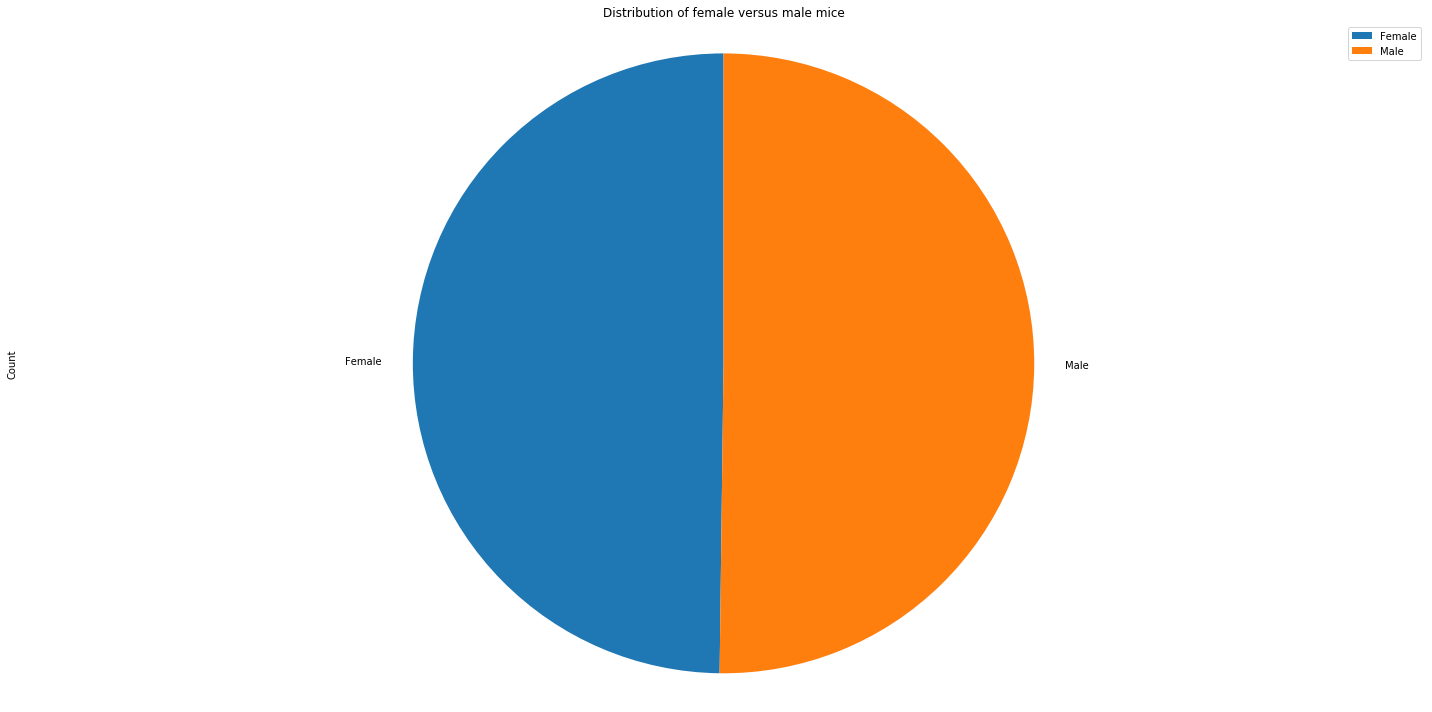

In [89]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_demographic_count = mouse_metadata.groupby("Sex")["Mouse ID"].count()
mouse_demographic_count = mouse_demographic_count.reset_index(name='Count')

mouse_demographic_pie = mouse_demographic_count.plot.pie(y="Count", title="Distribution of female versus male mice", 
                                                         labels=mouse_demographic_count["Sex"], startangle=90)

plt.axis("equal")
plt.tight_layout()
plt.show()

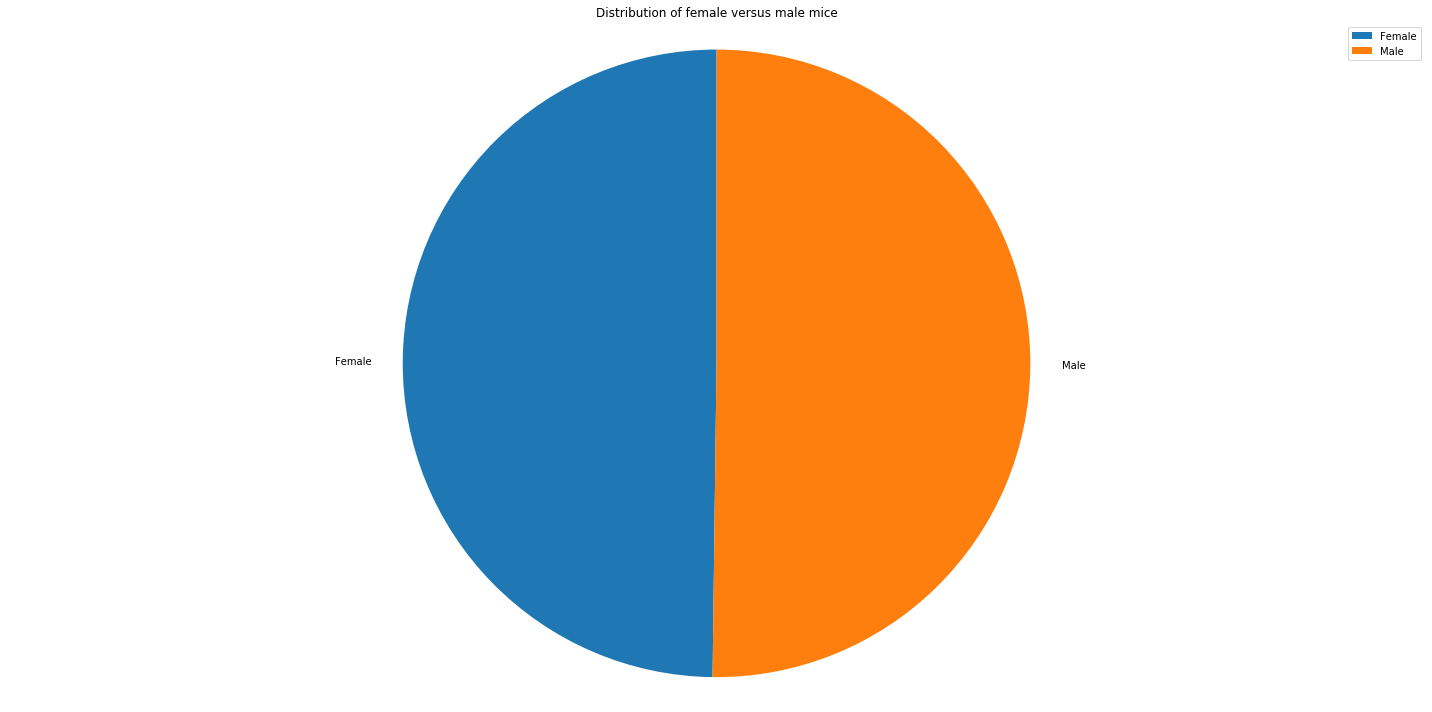

In [90]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mouse_demographic_count["Count"],labels=mouse_demographic_count['Sex'], startangle=90)
plt.axis('equal')
plt.legend(loc='upper right')
plt.title("Distribution of female versus male mice")

# View the plot
plt.tight_layout()
plt.show()

## Quartiles, outliers and boxplots

In [91]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

top_four_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
four_regimen_results = mouse_study_results.loc[(mouse_study_results['Drug Regimen'].isin(top_four_regimens)) & 
                                              (mouse_study_results['Timepoint']==45)] 
#four_regimen_results = mouse_study_results.loc[mouse_study_results['Timepoint']==45] 

#four_regimen_results = pd.pivot_table(four_regimen_results, index=['Timepoint'], 
#                                      values=["Tumor Volume (mm3)"], columns=['Mouse ID'])
#four_regimen_results


 # Determine if there are any potential outliers in the average occupancy in California
quartiles = four_regimen_results['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_tumor_volume = four_regimen_results.loc[(four_regimen_results['Tumor Volume (mm3)'] < lower_bound) | 
                                        (four_regimen_results['Tumor Volume (mm3)'] > upper_bound)]
outlier_tumor_volume

The lower quartile of tumor volume is: 33.48002734
The upper quartile of tumor volume is: 62.14221369
The interquartile range of tumor volume is: 28.66218635
The the median of tumor volume is: 40.1592203 
Values below -9.513252184999999 could be outliers.
Values above 105.135493215 could be outliers.


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


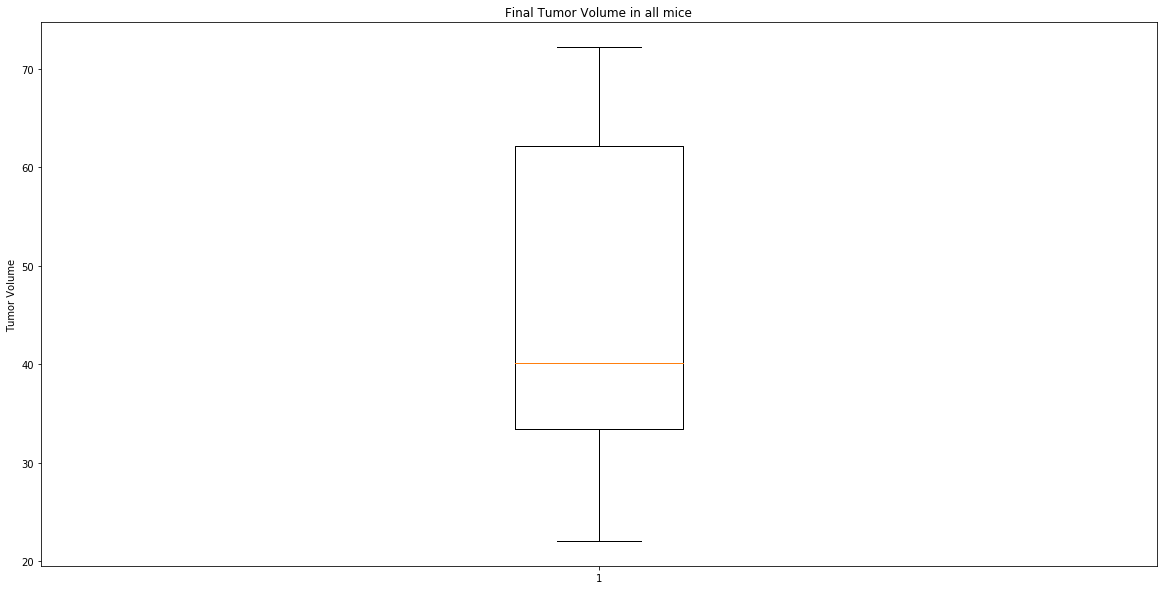

In [92]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
four_regimen_results = pd.pivot_table(four_regimen_results, index=['Timepoint'], 
                                      values=["Tumor Volume (mm3)"], columns=['Mouse ID'])

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume in all mice')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot(four_regimen_results)
plt.show()

## Line and scatter plots

Text(0, 0.5, 'Tumor Volume')

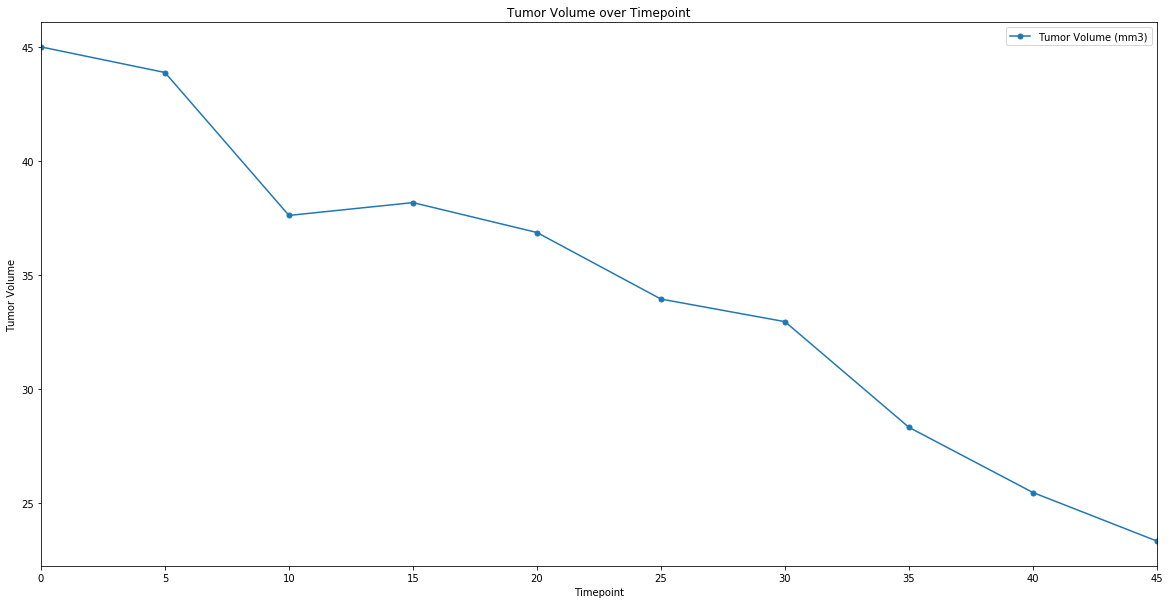

In [93]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
s185_regimen_results = mouse_study_results.loc[(mouse_study_results['Drug Regimen'] == 'Capomulin')
                                                   & (mouse_study_results['Mouse ID'] == 's185')] 
s185_regimen_results = s185_regimen_results[['Timepoint', 'Tumor Volume (mm3)']]
#s185_line = s185_regimen_results.plot.line()
s185_regimen_plot = s185_regimen_results.plot(kind='line',x='Timepoint', y='Tumor Volume (mm3)', 
                                              marker='.', markersize=10, title='Tumor Volume over Timepoint')
plt.ylabel("Tumor Volume")
#s185_regimen_results

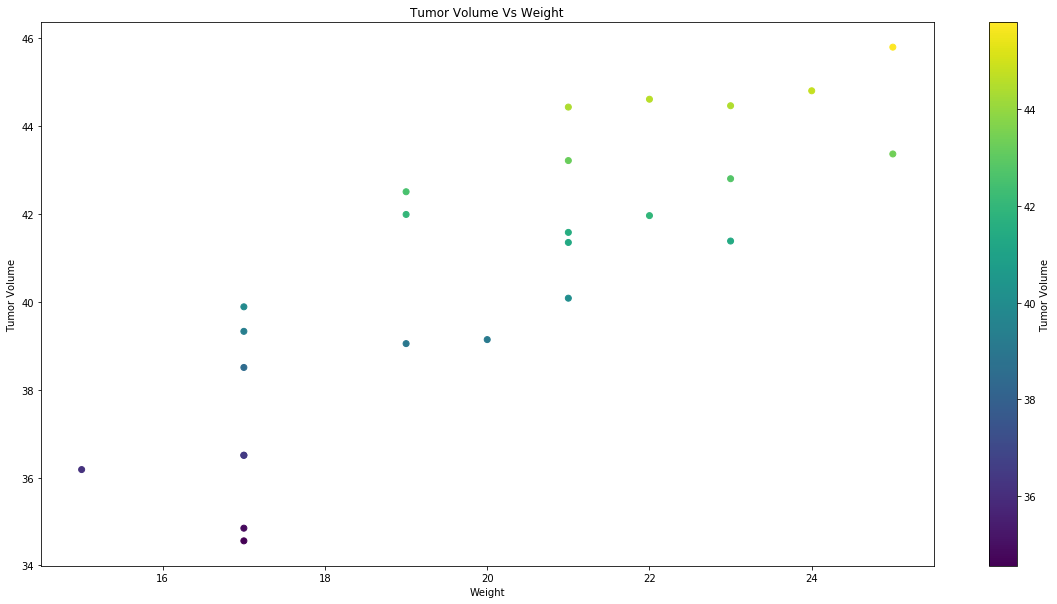

In [94]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

capomulin_regimen_results = mouse_study_results.loc[(mouse_study_results['Drug Regimen'] == 'Capomulin')]

#capomulin_regimen_results = pd.pivot_table(capomulin_regimen_results, index=['Timepoint'], 
#                                      values=["Tumor Volume (mm3)"], columns=['Mouse ID'])

capomulin_regimen_results = capomulin_regimen_results.groupby(['Mouse ID','Weight (g)'])['Tumor Volume (mm3)'].mean()
capomulin_regimen_results = capomulin_regimen_results.reset_index(name='Average Tumor Volume')
#capomulin_regimen_results

plt.scatter(capomulin_regimen_results['Weight (g)'],capomulin_regimen_results['Average Tumor Volume'],
            c=capomulin_regimen_results['Average Tumor Volume'])
clb = plt.colorbar()
plt.xlabel("Weight")
plt.ylabel("Tumor Volume")
clb.set_label("Tumor Volume")
plt.title('Tumor Volume Vs Weight')
plt.show()

In [95]:
# The correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen
weight = capomulin_regimen_results['Weight (g)']
tumor_volume = capomulin_regimen_results['Average Tumor Volume']
print(f"The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is {round(st.pearsonr(weight,tumor_volume)[0],2)}")


The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is 0.84


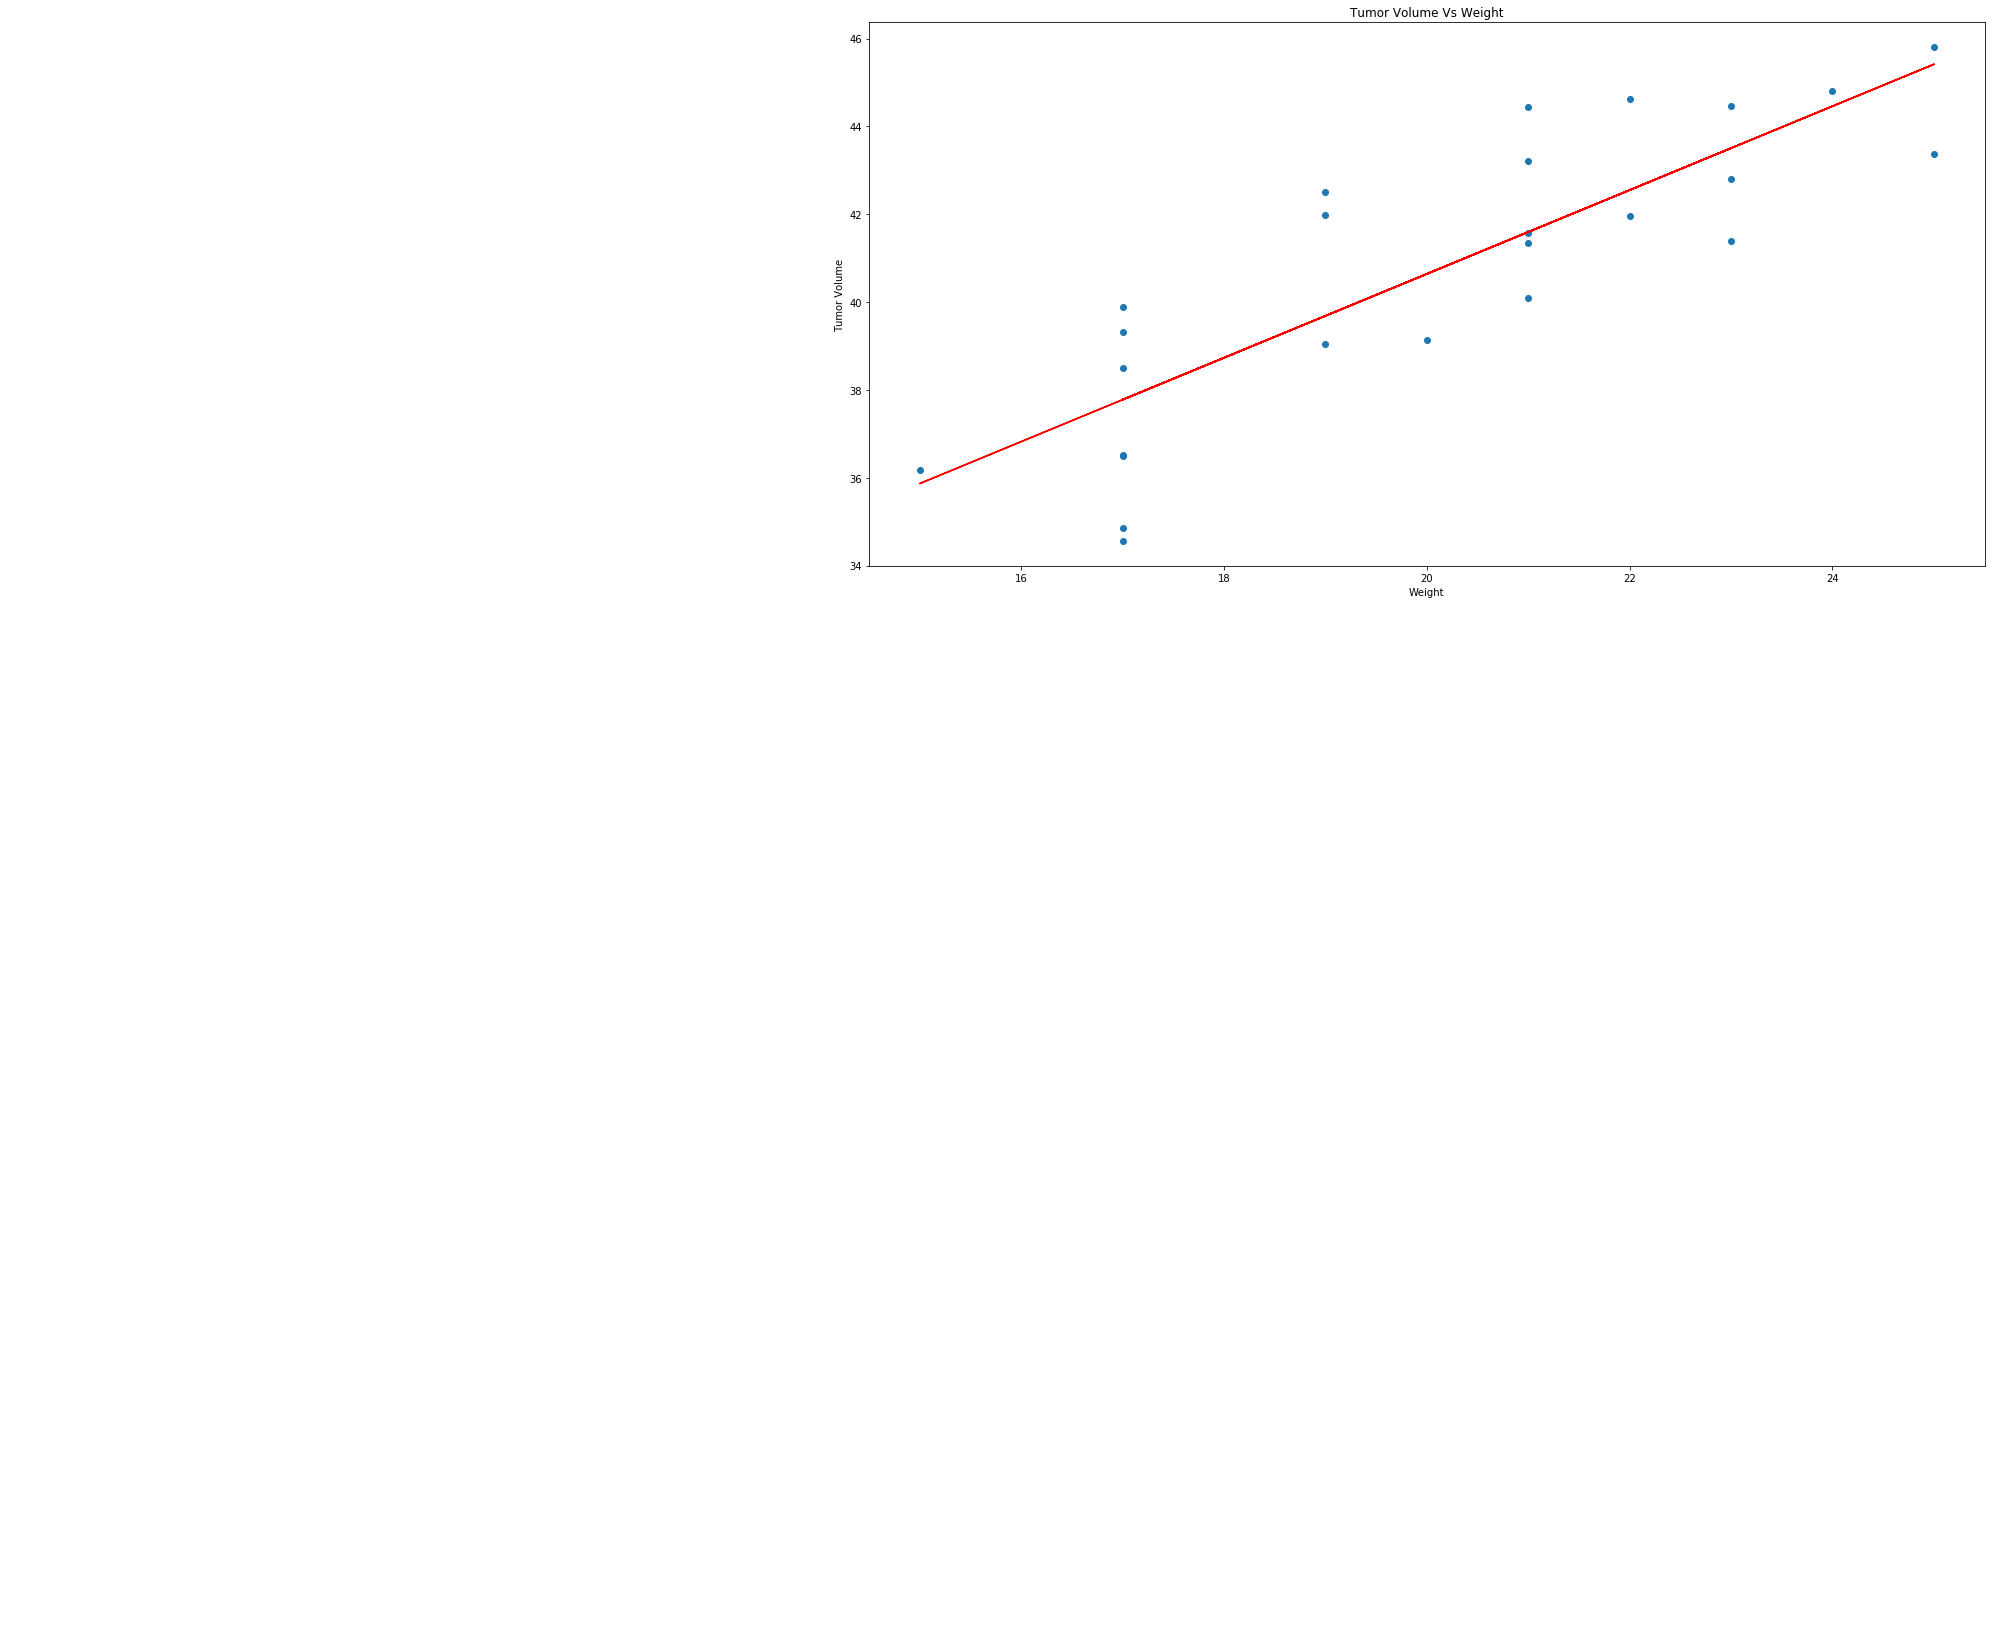

In [96]:
#The linear regression model for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, tumor_volume)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight,tumor_volume)
plt.plot(weight,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight')
plt.ylabel('Tumor Volume')
plt.title('Tumor Volume Vs Weight')
plt.show()

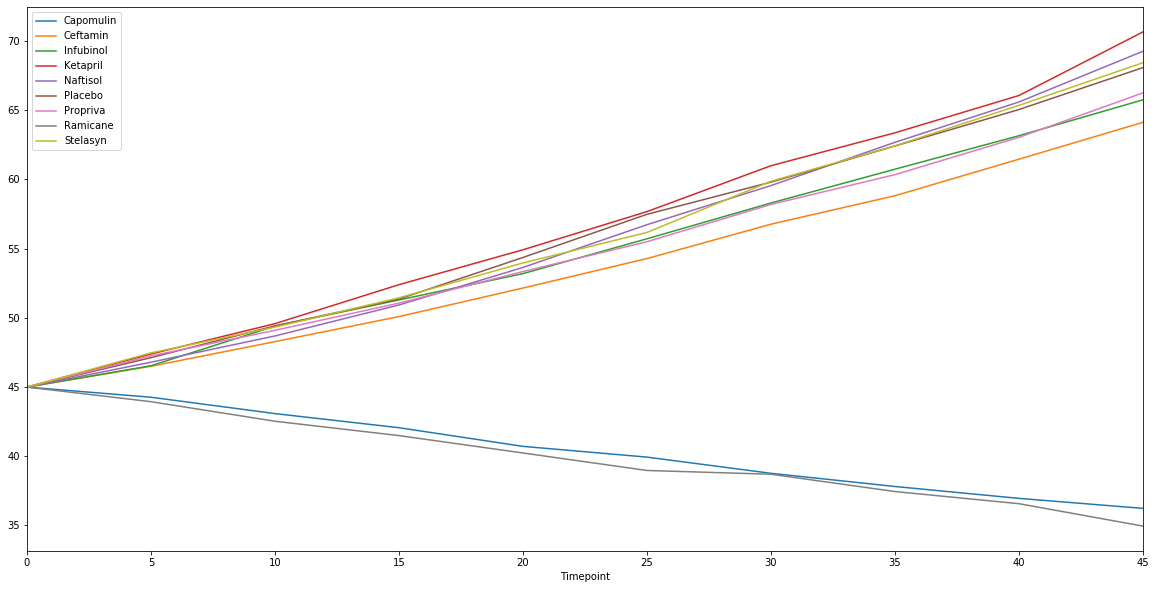

In [97]:
regimen_results = pd.pivot_table(mouse_study_results, index=['Timepoint'], 
                                 values=["Tumor Volume (mm3)"], columns=['Drug Regimen'])

regimen_results.columns = regimen_results.columns.droplevel(0) #remove amount
regimen_results.columns.name = None               #remove categories
regimen_results = regimen_results.reset_index() 
#regimen_results=regimen_results.set_index("Timepoint")
all_drug_regimens = regimen_results.iloc[:,1:10]
all_drug_regimens = all_drug_regimens.columns
all_drug_regimens
ax = plt.gca()
for drug_regimen in all_drug_regimens:
    regimen_results.plot(kind='line',x='Timepoint',y=drug_regimen,ax=ax)
plt.legend(loc="upper left")
plt.rcParams["figure.figsize"] = [20, 10]
plt.show()